In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/signal_metrics.csv')
data.head()

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
0,2023-05-05 12:50:40.000000,Anisabad,25.599109,85.137355,-84.274113,0.0,1.863890,129.122914,3G,0.000000,0.000000,0.000000
1,2023-05-05 12:53:47.210173,Fraser Road,25.433286,85.070053,-97.653121,0.0,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892
2,2023-05-05 12:56:54.420346,Boring Canal Road,25.498809,85.211371,-87.046134,0.0,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070
3,2023-05-05 13:00:01.630519,Danapur,25.735138,85.208400,-94.143159,0.0,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698
4,2023-05-05 13:03:08.840692,Phulwari Sharif,25.538556,85.159860,-94.564765,0.0,38.292038,30.342828,5G,-90.489100,-103.318304,-95.102467


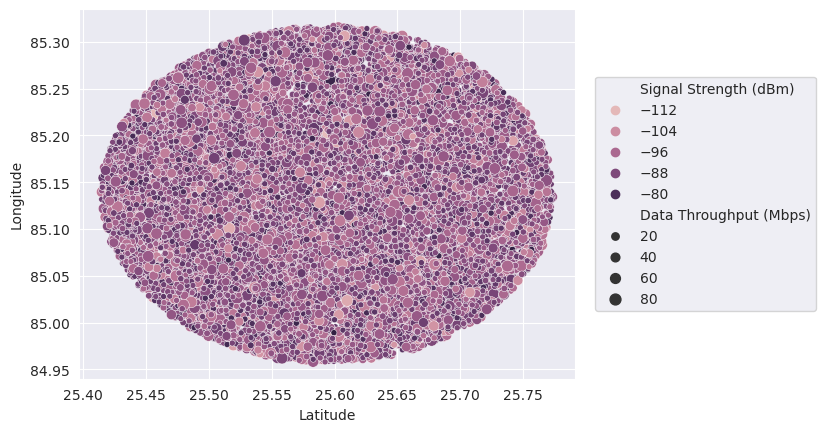

In [3]:
sns.scatterplot(data, x= 'Latitude', y = 'Longitude' ,hue = data['Signal Strength (dBm)'], size = data['Data Throughput (Mbps)'], legend= True)
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))



The figure above does not provide any indication of valuable information.Therefore I'll do analysis bassed on Network Type

We have to analyse each network type

<Figure size 3200x2400 with 0 Axes>

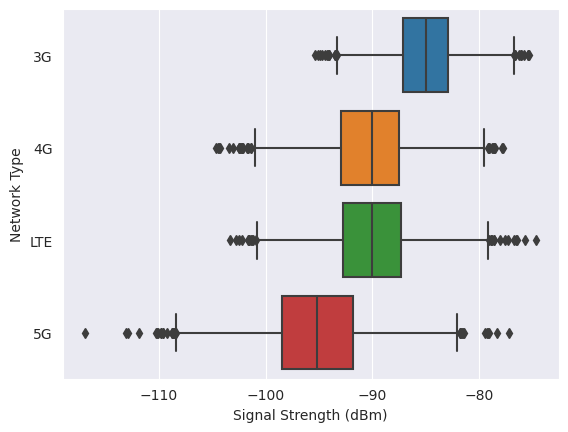

<Figure size 3200x2400 with 0 Axes>

In [4]:
sns.boxplot(data, x = 'Signal Strength (dBm)', y= 'Network Type')
plt.figure(dpi=500)

<Figure size 3200x2400 with 0 Axes>

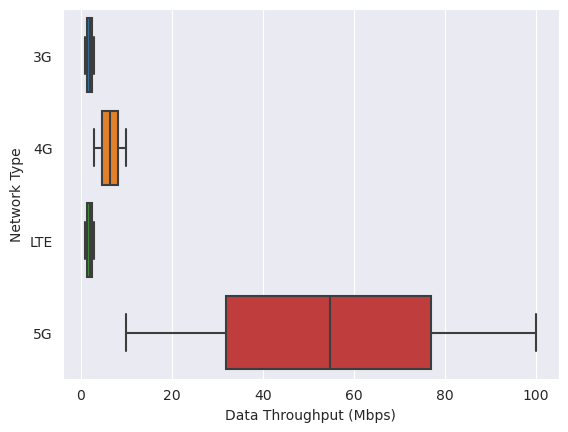

<Figure size 3200x2400 with 0 Axes>

In [5]:
sns.boxplot(data, x = 'Data Throughput (Mbps)', y= 'Network Type')
plt.figure(dpi=500)

In [6]:
cat1 = data[data['Network Type'] == '3G']
cat2 = data[data['Network Type'] == '4G']
cat3 = data[data['Network Type'] == 'LTE']
cat4 = data[data['Network Type'] == '5G']

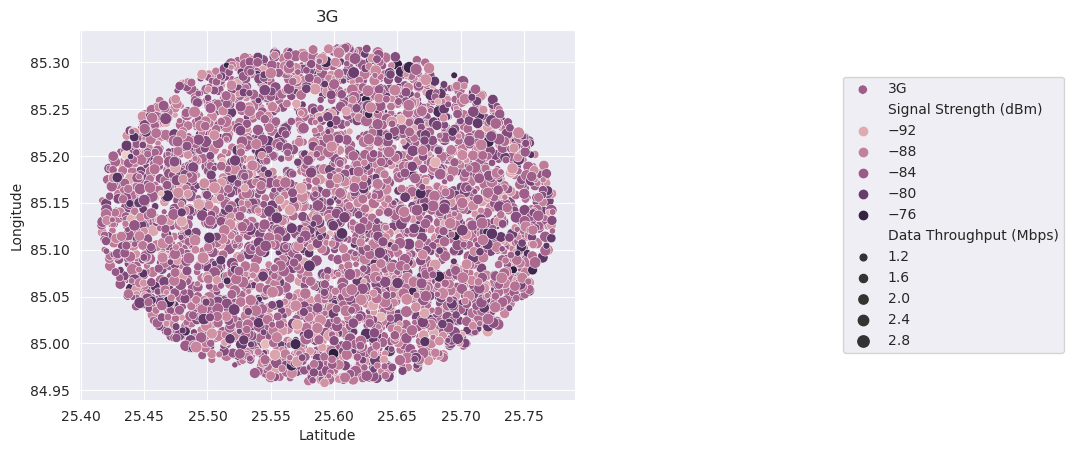

<Figure size 3200x2400 with 0 Axes>

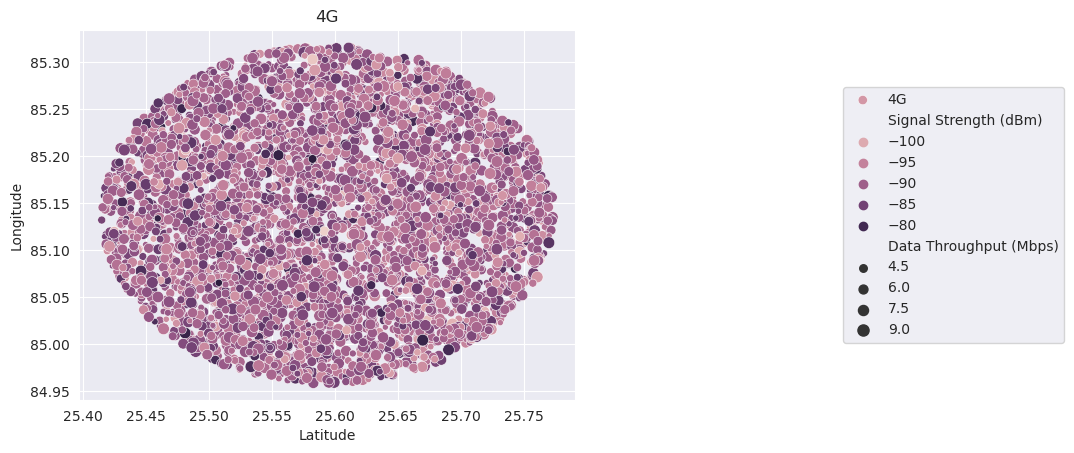

<Figure size 3200x2400 with 0 Axes>

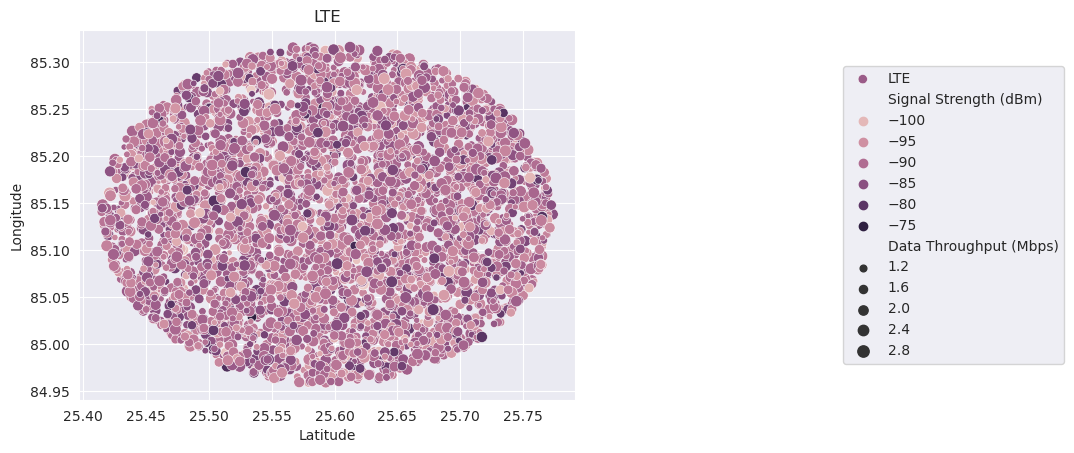

<Figure size 3200x2400 with 0 Axes>

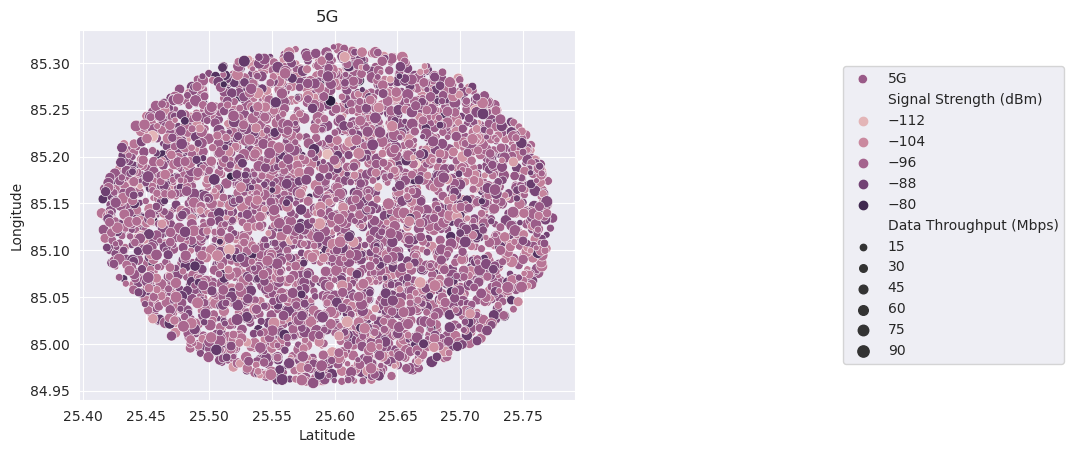

<Figure size 3200x2400 with 0 Axes>

In [7]:


a = sns.scatterplot(data=cat1, x='Latitude', y='Longitude', hue='Signal Strength (dBm)', size='Data Throughput (Mbps)', legend=True, label='3G')
a.set_title('3G')
plt.figure(dpi=500)
a.legend(loc='center right', bbox_to_anchor=(2, 0.5))
plt.show()

b = sns.scatterplot(data=cat2, x='Latitude', y='Longitude', hue='Signal Strength (dBm)', size='Data Throughput (Mbps)', legend=True, label='4G')
b.set_title('4G')
plt.figure(dpi=500)
b.legend(loc='center right', bbox_to_anchor=(2, 0.5))
plt.show()

c = sns.scatterplot(data=cat3, x='Latitude', y='Longitude', hue='Signal Strength (dBm)', size='Data Throughput (Mbps)', legend=True, label='LTE')
c.set_title('LTE')
plt.figure(dpi=500)
c.legend(loc='center right', bbox_to_anchor=(2, 0.5))
plt.show()

d = sns.scatterplot(data=cat4, x='Latitude', y='Longitude', hue='Signal Strength (dBm)', size='Data Throughput (Mbps)', legend=True, label='5G')
d.set_title('5G')
plt.figure(dpi=500)
d.legend(loc='center right', bbox_to_anchor=(2, 0.5))




In [8]:
corr = data.corr()

/tmp/ipykernel_16536/3740104963.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

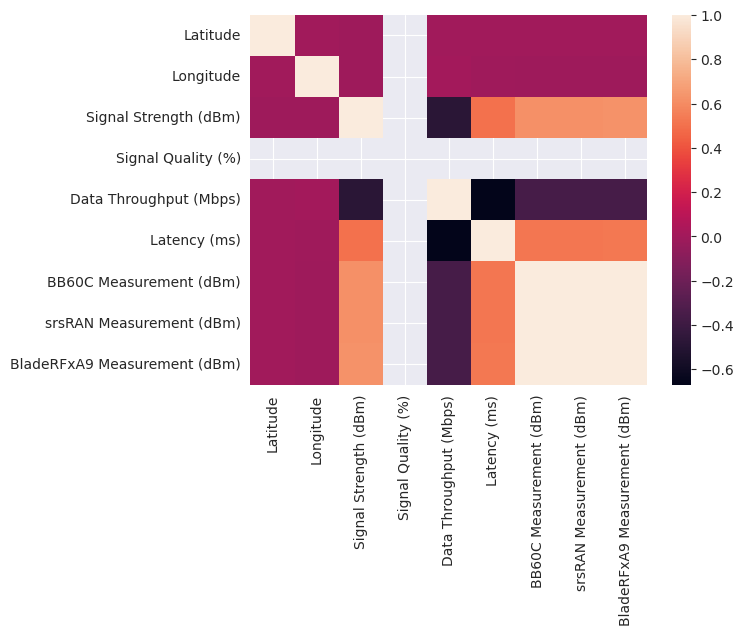

In [9]:
sns.heatmap(corr)

<Figure size 5000x5000 with 0 Axes>

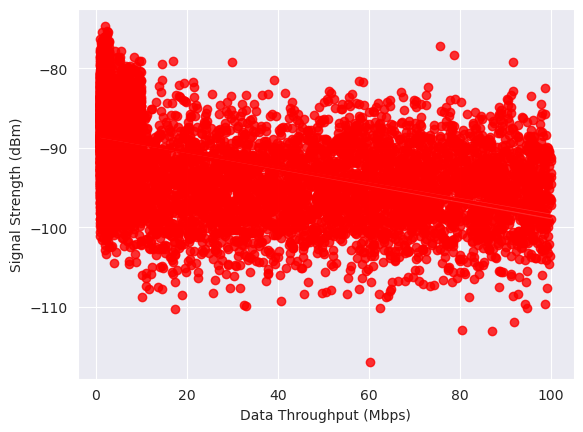

<Figure size 5000x5000 with 0 Axes>

In [13]:
#sns.scatterplot(data=data, x='Data Throughput (Mbps)', y='Signal Strength (dBm)', hue=data['Signal Strength (dBm)'],alpha = 0.5)
sns.regplot(data=data, x='Data Throughput (Mbps)', y='blade', color = 'red')
plt.figure(dpi=500, figsize=(10,10))

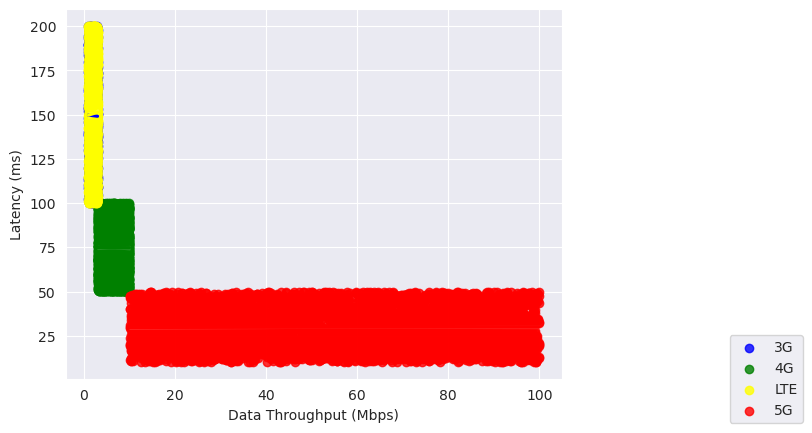

In [18]:
sns.regplot(data=cat1, x='Data Throughput (Mbps)', y='Latency (ms)', color = 'blue', label='3G')
sns.regplot(data=cat2, x='Data Throughput (Mbps)', y='Latency (ms)', color = 'green', label='4G')
sns.regplot(data=cat3, x='Data Throughput (Mbps)', y='Latency (ms)', color = 'yellow', label='LTE')
sns.regplot(data=cat4, x='Data Throughput (Mbps)', y='Latency (ms)', color = 'red', label='5G')
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0))
plt.title('Latency for each Network Type')

Text(0.5, 1.0, 'srsRAN Measurement for each network type')

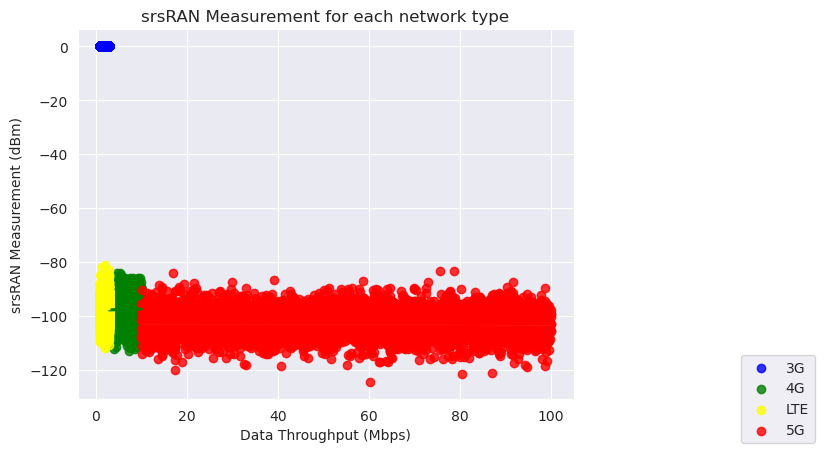

In [20]:
sns.regplot(data=cat1, x='Data Throughput (Mbps)', y='srsRAN Measurement (dBm)', color = 'blue', label='3G')
sns.regplot(data=cat2, x='Data Throughput (Mbps)', y='srsRAN Measurement (dBm)', color = 'green', label='4G')
sns.regplot(data=cat3, x='Data Throughput (Mbps)', y='srsRAN Measurement (dBm)', color = 'yellow', label='LTE')
sns.regplot(data=cat4, x='Data Throughput (Mbps)', y='srsRAN Measurement (dBm)', color ='red', label='5G')
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0))
plt.title('srsRAN Measurement for each network type')


Text(0.5, 1.0, 'BladeRFxA9 Measurement for each network type')

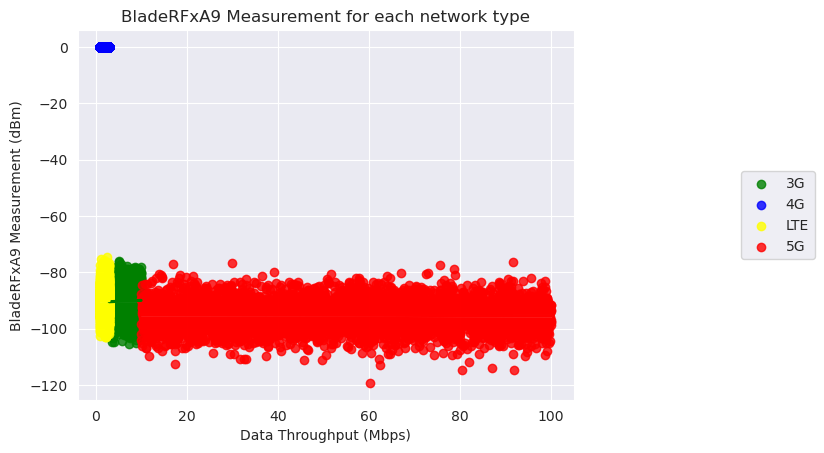

In [24]:
sns.regplot(data=cat2, x='Data Throughput (Mbps)', y='BladeRFxA9 Measurement (dBm)', color = 'green', label='3G')
sns.regplot(data=cat1, x='Data Throughput (Mbps)', y='BladeRFxA9 Measurement (dBm)', color = 'blue', label='4G')
sns.regplot(data=cat3, x='Data Throughput (Mbps)', y='BladeRFxA9 Measurement (dBm)', color = 'yellow', label='LTE')
sns.regplot(data=cat4, x='Data Throughput (Mbps)', y='BladeRFxA9 Measurement (dBm)', color ='red', label='5G')
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.title('BladeRFxA9 Measurement for each network type')

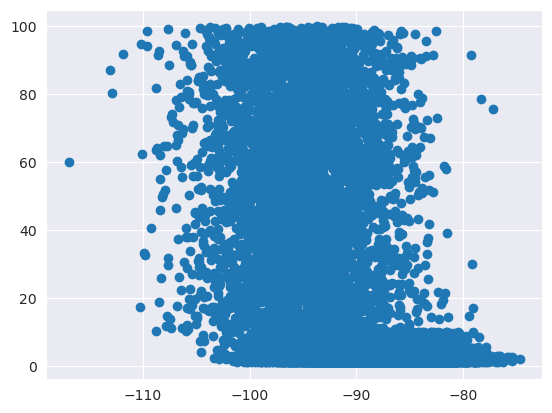

In [26]:
data.describe()

,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
count,16829.000000,16829.000000,16829.000000,16829.0,16829.000000,16829.000000,16829.000000,16829.000000,16829.000000
mean,25.594796,85.137314,-90.072484,0.0,16.182856,101.313624,-68.820150,-74.439562,-68.819930
std,0.089881,0.090095,5.399368,0.0,25.702734,56.010418,40.046739,43.215204,39.996934
min,25.414575,84.957936,-116.942267,0.0,1.000423,10.019527,-115.667514,-124.652054,-119.207545
25%,25.522858,85.064124,-93.615962,0.0,2.001749,50.320775,-94.021959,-101.249987,-93.749032
50%,25.595383,85.138149,-89.665566,0.0,2.997175,100.264318,-89.126942,-96.838442,-89.282746
75%,25.667620,85.209504,-86.145491,0.0,9.956314,149.951112,0.000000,0.000000,0.000000
max,25.773648,85.316994,-74.644848,0.0,99.985831,199.991081,0.000000,0.000000,0.000000
